In [ ]:
# 한글 글꼴 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

fatal: destination path 'tensorflow-ml-nlp-tf2' already exists and is not an empty directory.


In [ ]:
%cd tensorflow-ml-nlp-tf2/6.CHATBOT/

/content/tensorflow-ml-nlp-tf2/6.CHATBOT


In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

In [ ]:
# 데이터 불러오기
DATA_IN_PATH = './data_in/'

data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv', encoding='utf-8')
data

Q                         A  label
0                       12시 땡!                하루가 또 가네요.      0
1                  1지망 학교 떨어졌어                 위로해 드립니다.      0
2                 3박4일 놀러가고 싶다               여행은 언제나 좋죠.      0
3              3박4일 정도 놀러가고 싶다               여행은 언제나 좋죠.      0
4                      PPL 심하네                눈살이 찌푸려지죠.      0
...                        ...                       ...    ...
11818           훔쳐보는 것도 눈치 보임.        티가 나니까 눈치가 보이는 거죠!      2
11819           훔쳐보는 것도 눈치 보임.             훔쳐보는 거 티나나봐요.      2
11820              흑기사 해주는 짝남.                    설렜겠어요.      2
11821  힘든 연애 좋은 연애라는게 무슨 차이일까?  잘 헤어질 수 있는 사이 여부인 거 같아요.      2
11822               힘들어서 결혼할까봐        도피성 결혼은 하지 않길 바라요.      2

[11823 rows x 3 columns]

In [ ]:
# 데이터 확인
sentences = list(data['Q']) + list(data['A'])
sentences[:10]

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨']

In [ ]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_emjeol = [len(s.replace(' ', '')) for s in sentences]

In [ ]:
tokenized_sentences[:10]

[['12시', '땡!'],
 ['1지망', '학교', '떨어졌어'],
 ['3박4일', '놀러가고', '싶다'],
 ['3박4일', '정도', '놀러가고', '싶다'],
 ['PPL', '심하네'],
 ['SD카드', '망가졌어'],
 ['SD카드', '안돼'],
 ['SNS', '맞팔', '왜', '안하지ㅠㅠ'],
 ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간낭비인데', '자꾸', '보게됨']]

In [ ]:
# Okt 형태분석기로 토큰화
okt = Okt()

# 방법 1
morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [ ]:
morph_tokenized_sentences[:10]

[['12시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌어'],
 ['3', '박', '4일', '놀러가고싶다'],
 ['3', '박', '4일', '정도놀러가고싶다'],
 ['PPL', '심하네'],
 ['SD', '카드', '망가졌어'],
 ['SD', '카드', '안', '돼'],
 ['SNS', '맞팔', '왜', '안하지', 'ㅠㅠ'],
 ['SNS', '시간', '낭비', '인거', '아는데', '매일', '하', '는', '중'],
 ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]

In [ ]:
# 방법 2
morph_tokenized_sentences = [okt.morphs(s) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [ ]:
morph_tokenized_sentences[:10]

[['12시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌어'],
 ['3', '박', '4일', '놀러', '가고', '싶다'],
 ['3', '박', '4일', '정도', '놀러', '가고', '싶다'],
 ['PPL', '심하네'],
 ['SD', '카드', '망가졌어'],
 ['SD', '카드', '안', '돼'],
 ['SNS', '맞팔', '왜', '안', '하지', 'ㅠㅠ'],
 ['SNS', '시간', '낭비', '인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Text(0, 0.5, '문장 수')

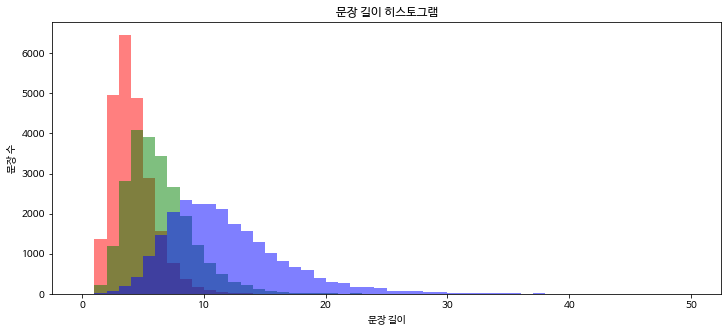

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='어절')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='형태소')
plt.hist(sent_len_by_emjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='음절')

plt.title('문장 길이 히스토그램')
plt.xlabel('문장 길이')
plt.ylabel('문장 수')

Text(0, 0.5, '문장 수')

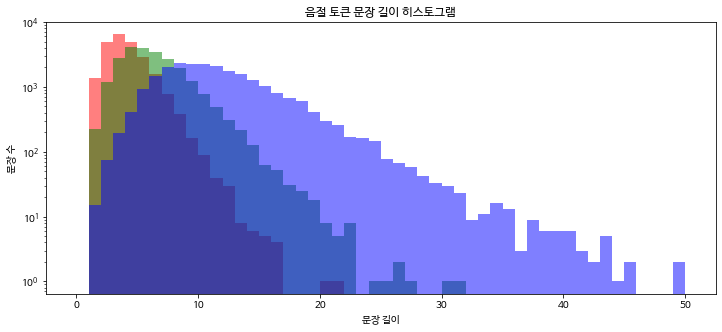

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='어절')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='형태소')
plt.hist(sent_len_by_emjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='음절')
plt.yscale('log')
plt.title('음절 토큰 문장 길이 히스토그램')
plt.xlabel('문장 길이')
plt.ylabel('문장 수')

In [ ]:
print("어절 최대 길이 : {}".format(np.max(sent_len_by_token)))
print("어절 최소 길이 : {}".format(np.min(sent_len_by_token)))
print("어절 평균 길이 : {}".format(np.mean(sent_len_by_token)))
print("어절 길이 표준편차 : {:.2f}".format(np.std(sent_len_by_token)))
print("어절 중간 길이 : {:.2f}".format(np.median(sent_len_by_token)))
print("제 1사분위 길이 : {}".format(np.percentile(sent_len_by_token, 25)))
print("제 3사분위 길이 : {}".format(np.percentile(sent_len_by_token, 75)))

어절 최대 길이 : 21
어절 최소 길이 : 1
어절 평균 길이 : 3.6405311680622514
어절 길이 표준편차 : 1.74
어절 중간 길이 : 3.00
제 1사분위 길이 : 2.0
제 3사분위 길이 : 5.0


In [ ]:
print("형태소 어절 최대 길이 : {}".format(np.max(sent_len_by_morph)))
print("형태소 어절 최소 길이 : {}".format(np.min(sent_len_by_morph)))
print("형태소 어절 평균 길이 : {}".format(np.mean(sent_len_by_morph)))
print("형태소 어절 길이 표준편차 : {:.2f}".format(np.std(sent_len_by_morph)))
print("형태소 어절 중간 길이 : {:.2f}".format(np.median(sent_len_by_morph)))
print("형태소 제 1사분위 길이 : {}".format(np.percentile(sent_len_by_morph, 25)))
print("형태소 제 3사분위 길이 : {}".format(np.percentile(sent_len_by_morph, 75)))

형태소 어절 최대 길이 : 31
형태소 어절 최소 길이 : 1
형태소 어절 평균 길이 : 5.832995009726804
형태소 어절 길이 표준편차 : 2.71
형태소 어절 중간 길이 : 5.00
형태소 제 1사분위 길이 : 4.0
형태소 제 3사분위 길이 : 7.0


In [ ]:
print("음절 최대 길이 : {}".format(np.max(sent_len_by_emjeol)))
print("음절 최소 길이 : {}".format(np.min(sent_len_by_emjeol)))
print("음절 평균 길이 : {}".format(np.mean(sent_len_by_emjeol)))
print("음절 길이 표준편차 : {:.2f}".format(np.std(sent_len_by_emjeol)))
print("음절 중간 길이 : {:.2f}".format(np.median(sent_len_by_emjeol)))
print("음절 제 1사분위 길이 : {}".format(np.percentile(sent_len_by_emjeol, 25)))
print("음절 제 3사분위 길이 : {}".format(np.percentile(sent_len_by_emjeol, 75)))

음절 최대 길이 : 57
음절 최소 길이 : 1
음절 평균 길이 : 11.306563477966675
음절 길이 표준편차 : 4.98
음절 중간 길이 : 10.00
음절 제 1사분위 길이 : 8.0
음절 제 3사분위 길이 : 14.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f2cd7620810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2cd7623890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2cd76298d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2cd7629390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2cd7620e50>,
  <matplotlib.lines.Line2D at 0x7f2cd75b6f90>]}

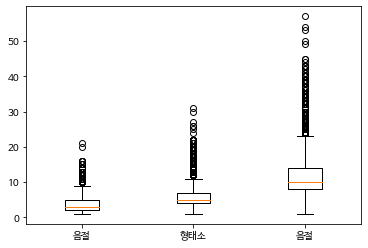

In [ ]:
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_emjeol], 
            labels=['음절', '형태소', '음절'])

In [ ]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

In [ ]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

In [ ]:
for s in query_sentences:
    for token, tag in okt.pos(s):
        if tag in ['Noun', 'Verb', 'Adjective']:
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    for token, tag in okt.pos(s):
        if tag in ['Noun', 'Verb', 'Adjective']:
            answer_NVA_token_sentences.append(token)

query_NVA_token_sentences = " ".join(query_NVA_token_sentences)
answer_NVA_token_sentences = " ".join(answer_NVA_token_sentences)

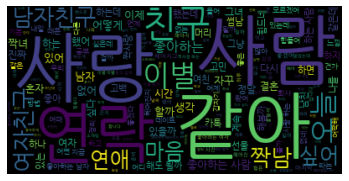

In [ ]:
query_wordcloud = WordCloud(font_path = DATA_IN_PATH + "NanumGothic.ttf").generate(query_NVA_token_sentences)
plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

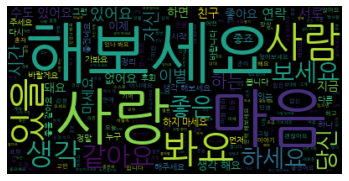

In [ ]:
answer_wordcloud = WordCloud(font_path= DATA_IN_PATH + "NanumGothic.ttf").generate(answer_NVA_token_sentences)
plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()